<a href="https://colab.research.google.com/github/TirsitEndeshaw/Data-Analysis-projects/blob/main/sentiment_analsis_tirsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and loading files

In [ ]:
import pandas as pd  #importing pandas library
import numpy as np  #importing numpy library

df = pd.read_csv('/content/twitter_dataset_realistic.csv')  #Loading the file

In [ ]:
print (df.info()) # understanding about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    2000 non-null   int64 
 1   username   2000 non-null   object
 2   age_group  2000 non-null   object
 3   location   2000 non-null   object
 4   tweet      2000 non-null   object
 5   date       2000 non-null   object
 6   likes      2000 non-null   int64 
 7   retweets   2000 non-null   int64 
 8   replies    2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB
None


In [ ]:
df.head()  # looking at column titles and data structures

,user_id,username,age_group,location,tweet,date,likes,retweets,replies
0,6971,vvheresk,Adults,France,We need to do more to reduce plastic waste. Sm...,6/10/2024,553,255,43
1,3984,vsbgvllb,Children,France,Renewable energy is the future. Let's invest i...,2/22/2024,570,423,157
2,7954,zapagorw,Young Adults,Australia,Why do people litter so much? Please keep our ...,10/2/2024,15,182,144
3,3165,fqqyhcae,Young Adults,Australia,Why do people litter so much? Please keep our ...,5/20/2024,567,108,65
4,5573,zsnridcd,Children,UK,Had an amazing day volunteering to plant trees...,3/10/2024,645,307,184


In [ ]:
# creating a function to clean the content of the tweets
import re
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"\@\w+|\#", '', text)  # Remove mentions and hashtags
    text = re.sub(r"[^\w\s]", '', text)  # Remove special characters
    return text

In [ ]:
df['cleaned_tweet'] = df['tweet'].apply(clean_text)  # saving cleaned tweet with name cleaned_tweet

In [ ]:
# Handle Missing Data: Drop rows with critical missing values
df = df.dropna()

In [ ]:
# Calculate Sentiment Scores: Use a pre-trained sentiment analysis model like VADER from the nltk library.
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import download

# Initialize VADER
download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores
df['sentiment_score'] = df['cleaned_tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#Classify Sentiments: Define a function to classify sentiment based on the score:
def classify_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)

In [ ]:
#Save Processed Data: Export the cleaned and annotated dataset to a new CSV file:
df.to_csv('processed_tweeter_reviews.csv', index=False)

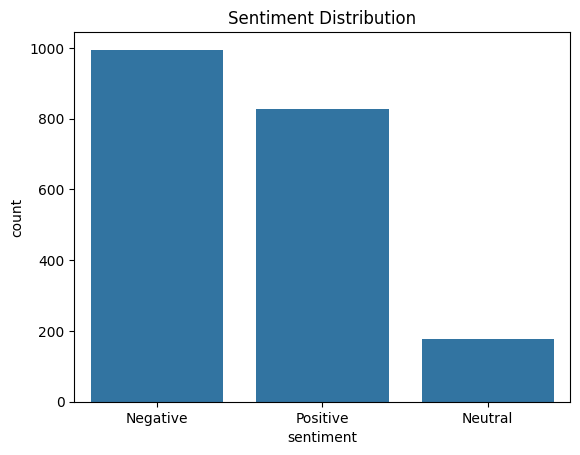

In [ ]:
# Visualize Sentiment Distribution: Create a bar chart to show the overall distribution of sentiments:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

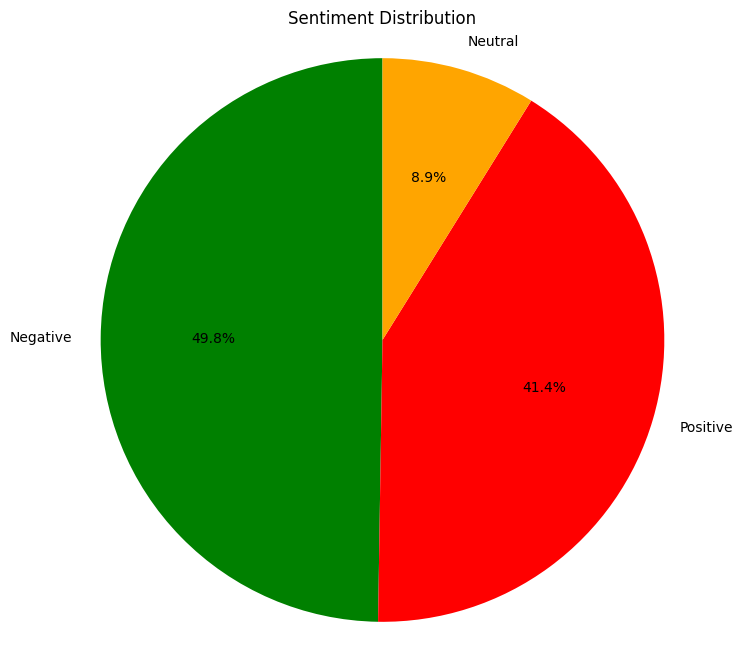

In [ ]:
# Visualize Sentiment Distribution as a Pie Chart
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['green', 'red', 'orange']  # Define colors for Positive, Negative, Neutral

plt.figure(figsize=(8, 8))  # Adjust figure size for better visualization
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

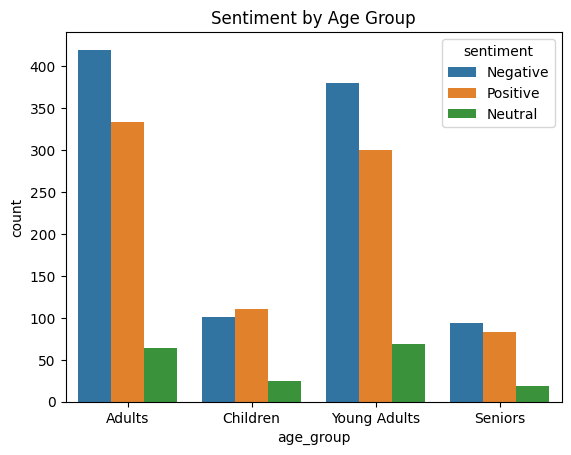

In [ ]:
# Analyze Sentiment by Age Group: Use a grouped bar chart to compare sentiment across age groups:
sns.countplot(data=df, x='age_group', hue='sentiment')
plt.title('Sentiment by Age Group')
plt.show()

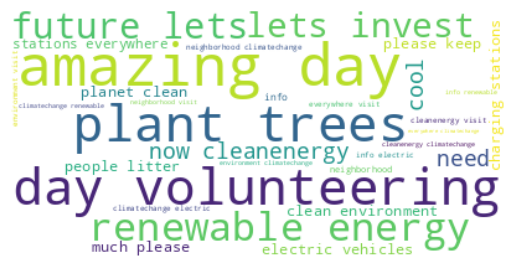

In [ ]:
#Word Cloud: Generate a word cloud for frequently used words in positive reviews:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_tweet'])
wordcloud = WordCloud(background_color='white').generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The frequently used words such as "amazing day," "plant," "trees," "volunteering," "renewable energy," and "future" reflect a strong focus on environmental initiatives and collective action. The positive tone of "amazing day" suggests enthusiasm and satisfaction, while words like "plant" and "trees" highlight activities related to sustainability. References to "volunteering" indicate community involvement, and "renewable energy" underscores an emphasis on forward-thinking and eco-friendly solutions. The phrase "future, let's invest" suggests optimism and a call to action for long-term commitment to environmental goals. This sentiment reflects a proactive and engaged attitude toward sustainability efforts.

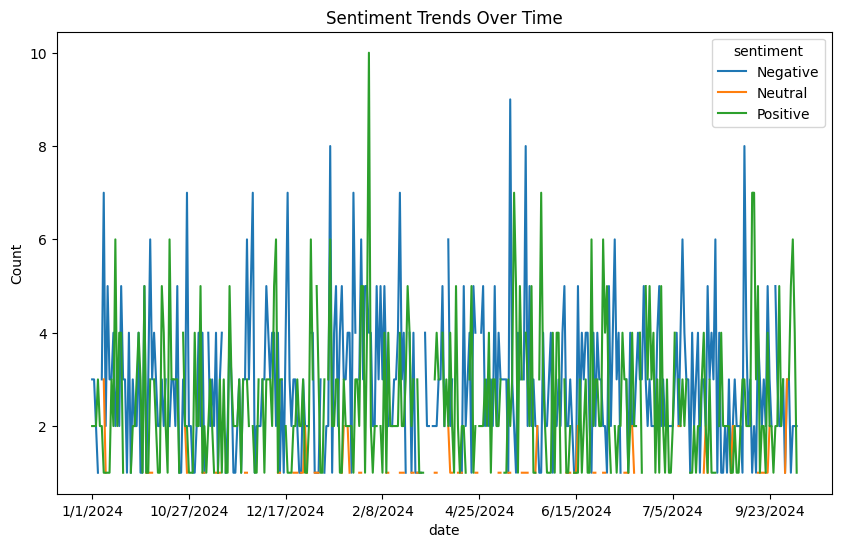

In [ ]:
#Sentiment Trends Over Time: Create a time series plot to analyze sentiment changes over time (if the dataset includes dates):
sentiment_trends = df.groupby(['date', 'sentiment']).size().unstack() #monthwise
sentiment_trends.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Trends Over Time')
plt.ylabel('Count')
plt.show()

# Analysis of the tweet patterns reveals a higher level of negative engagement compared to positive engagement, with only minimal neutral engagement observed.

In [ ]:
# Load dataset
df = pd.read_csv('/content/instagram_meaningful_dataset.csv')

In [ ]:
# Inspect the Data: Check for missing values and general structure:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Review ID    2000 non-null   object
 1   User ID      2000 non-null   object
 2   Age Group    2000 non-null   object
 3   Location     2000 non-null   object
 4   Review Text  2000 non-null   object
 5   Likes        2000 non-null   int64 
 6   Replies      2000 non-null   int64 
 7   Platform     2000 non-null   object
dtypes: int64(2), object(6)
memory usage: 125.1+ KB
None


In [ ]:
print(df.head())

                              Review ID                               User ID  \
0  91a65e3e-e89e-48dc-98ca-3548de0a6a09  af78d4e9-c788-4191-b777-173930c33d4a   
1  a3294af7-82b3-4911-a4a1-be0088b5d1cf  87f36d08-7141-4a11-9afa-2558dbbd6a0b   
2  77640add-3499-4349-a4c8-401b294dd92e  927b4181-dd4b-4afb-9359-414b8d5d6e6a   
3  c4b56ad5-27a5-45ad-8b08-a836b70b6ce2  8b9f6aed-839b-4aef-8dfe-42fe26b14892   
4  f9390ef1-4637-4029-ab1a-b277c031d0f6  beb935eb-848c-4e14-a6c6-8e916fd84862   

      Age Group          Location  \
0        Adults         Lake Jose   
1  Older Adults  West Mariahshire   
2  Older Adults        Port Katie   
3  Older Adults  West Patrickstad   
4      Children      Port Zachary   

                                         Review Text  Likes  Replies  \
0  Terrible customer service. I will not be comin...    226       10   
1  The service was excellent, and the staff was f...    218       18   
2             Average experience. Nothing stood out.    203       17   
3 

In [ ]:
df['cleaned_review'] = df['Review Text'].apply(clean_text)  # Apply the cleaning function to the 'Review Text' column


In [ ]:
#Handle Missing Data: Drop rows with critical missing values or fill them appropriately:
df = df.dropna()

In [ ]:
# Calculate sentiment scores
df['sentiment_score'] = df['cleaned_review'].apply(lambda x: sid.polarity_scores(x)['compound'])

In [ ]:
# Save Processed Data: Export the cleaned and annotated dataset to a new CSV file:
df.to_csv('processed_Instagram_reviews.csv', index=False)

In [ ]:
# Load the processed Instagram data
df = pd.read_csv('processed_Instagram_reviews.csv')

In [ ]:
# Recalculate sentiment if the column is missing
if 'sentiment' not in df.columns:
    # Classify Sentiments: Define a function to classify sentiment based on the score:
    def classify_sentiment(score):
        if score > 0.05:
            return 'Positive'
        elif score < -0.05:
            return 'Negative'
        else:
            return 'Neutral'
    df['sentiment'] = df['sentiment_score'].apply(classify_sentiment)


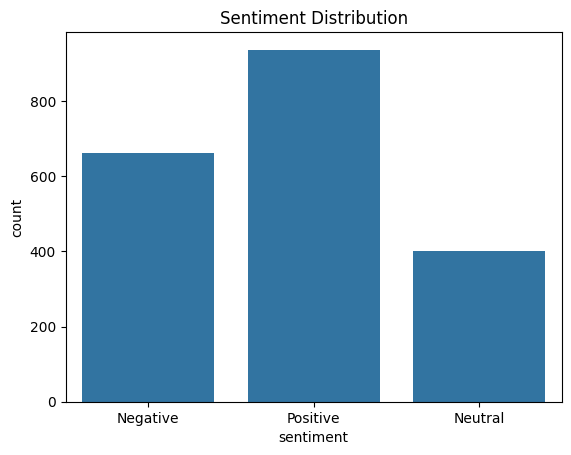

In [ ]:
# Visualize Sentiment Distribution: Create a bar chart to show the overall distribution of sentiments:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()

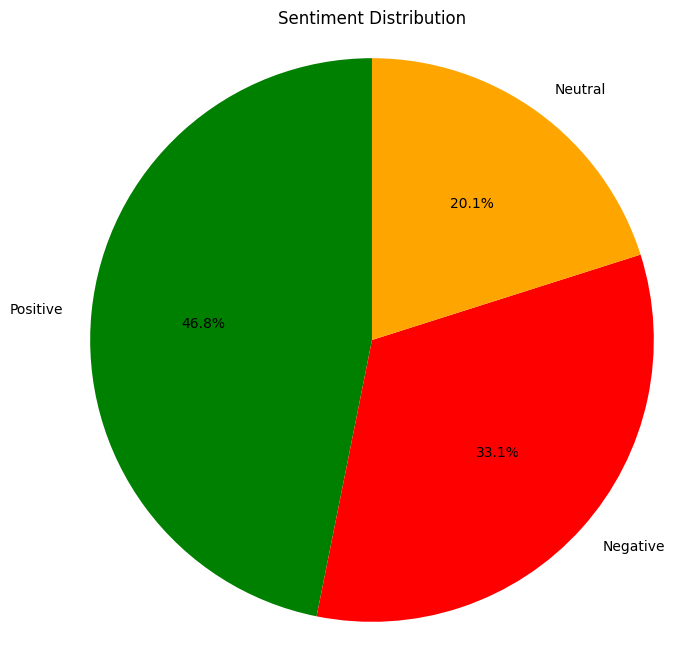

In [ ]:
# Visualize Sentiment Distribution as a Pie Chart
sentiment_counts = df['sentiment'].value_counts()
labels = sentiment_counts.index
sizes = sentiment_counts.values
colors = ['green', 'red', 'orange']  # Define colors for Positive, Negative, Neutral

plt.figure(figsize=(8, 8))  # Adjust figure size for better visualization
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

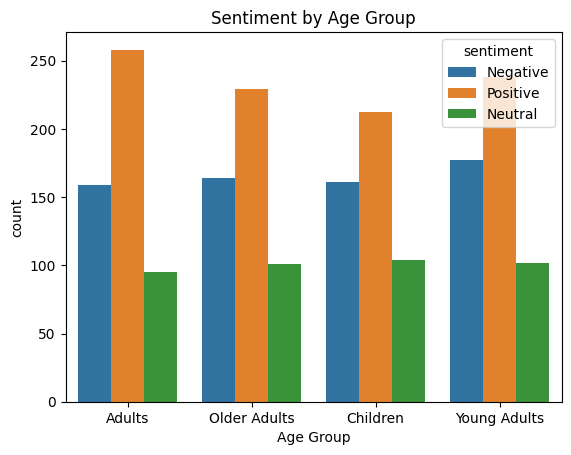

In [ ]:
# Analyze Sentiment by Age Group: Use a grouped bar chart to compare sentiment across age groups:
sns.countplot(data=df, x='Age Group', hue='sentiment')
plt.title('Sentiment by Age Group')
plt.show()

#Over all there is more positive sentiment than negative and neutral. More adult and young adults engagement noticed than chidren and older adults.

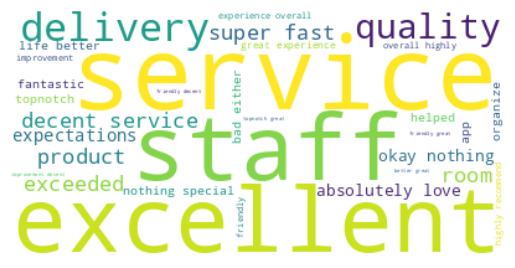

In [ ]:
# Word Cloud: Generate a word cloud for frequently used words in positive reviews:
from wordcloud import WordCloud

positive_text = ' '.join(df[df['sentiment'] == 'Positive']['cleaned_review'])
wordcloud = WordCloud(background_color='white').generate(positive_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


The frequently used words, such as "service," "staff," "excellent," "quality," and "delivery," indicate that users are predominantly discussing aspects of customer experience and product performance. Words like "excellent" and "quality" suggest positive sentiment and satisfaction, while mentions of "service" and "staff" highlight the importance of interactions and support in shaping user perceptions. "Delivery" may point to logistical aspects, which could be either praised or criticized depending on the context. This pattern suggests a focus on service delivery and user experience as key drivers of sentiment.